# Modeling

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, ensemble
from sklearn.linear_model._base import LinearModel
from sklearn.ensemble._forest import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from typing import List, Callable
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, explained_variance_score, max_error
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.base import _is_fitted

## Data Loading

loading Splits

In [129]:
df_train = pd.read_csv('data/interaction_train_set.csv', sep=',', header=0)
df_test = pd.read_csv('data/interaction_test_set.csv', sep=',', header=0)
df_val = pd.read_csv('data/interaction_val_set.csv', sep=',', header=0)

display(df_train)
display(df_test)
display(df_val)

,postings,channels,upvotes,downvotes,follows,ignores,neighbourhoodOverlap,minLocalClusterinCoefficient,tieStrength,reciprocity,multiplexity,closeness,sentiment,interactionFrequency
0,0.0,0.052632,0.000000,0.004329,0.0,0.0,0.041759,0.086509,0.071311,0.0,0.052632,0.0,0.25,0.001613
1,0.0,0.052632,0.001996,0.000000,0.0,0.0,0.144303,0.137996,0.147201,0.0,0.052632,0.0,0.75,0.001613
2,0.0,0.052632,0.001996,0.000000,0.0,0.0,0.056065,0.105168,0.089040,0.0,0.052632,0.0,0.75,0.001613
3,0.0,0.105263,0.001996,0.004329,0.0,0.0,0.071491,0.102574,0.094022,0.0,0.105263,0.0,0.50,0.003226
4,0.0,0.052632,0.000000,0.004329,0.0,0.0,0.098090,0.119818,0.116127,0.0,0.052632,0.0,0.25,0.001613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999071,0.0,0.052632,0.001996,0.000000,0.0,0.0,0.045760,0.129509,0.099780,0.0,0.052632,0.0,0.75,0.001613
999072,0.0,0.052632,0.001996,0.000000,0.0,0.0,0.077768,0.088530,0.087968,0.0,0.052632,0.0,0.75,0.001613
999073,0.0,0.052632,0.001996,0.000000,0.0,0.0,0.091390,0.115362,0.110489,0.0,0.052632,0.0,0.75,0.001613
999074,0.0,0.052632,0.001996,0.000000,0.0,0.0,0.098845,0.140302,0.129197,0.0,0.052632,0.0,0.75,0.001613


,postings,channels,upvotes,downvotes,follows,ignores,neighbourhoodOverlap,minLocalClusterinCoefficient,tieStrength,reciprocity,multiplexity,closeness,sentiment,interactionFrequency
0,0.000000,0.052632,0.001996,0.000000,0.0,0.0,0.092777,0.088645,0.094457,0.0,0.052632,0.000000,0.75,0.001613
1,0.000000,0.052632,0.000000,0.004329,0.0,0.0,0.066576,0.149828,0.121326,0.0,0.052632,0.000000,0.25,0.001613
2,0.000000,0.052632,0.001996,0.000000,0.0,0.0,0.076108,0.098931,0.093730,0.0,0.052632,0.014706,0.75,0.001613
3,0.000000,0.105263,0.003992,0.000000,0.0,0.0,0.148940,0.115246,0.135028,0.0,0.105263,0.000000,0.75,0.003226
4,0.000000,0.052632,0.001996,0.000000,0.0,0.0,0.089826,0.107014,0.104626,0.0,0.052632,0.000000,0.75,0.001613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110080,0.000000,0.052632,0.001996,0.000000,0.0,0.0,0.044266,0.121877,0.094391,0.0,0.052632,0.000000,0.75,0.001613
1110081,0.002976,0.157895,0.003992,0.008658,0.0,0.0,0.266599,0.090493,0.169940,0.0,0.157895,0.000000,0.50,0.008065
1110082,0.000000,0.052632,0.003992,0.000000,0.0,0.0,0.091431,0.101757,0.102041,0.0,0.052632,0.000000,0.75,0.003226
1110083,0.000000,0.052632,0.001996,0.000000,0.0,0.0,0.033607,0.102411,0.077720,0.0,0.052632,0.000000,0.75,0.001613


,postings,channels,upvotes,downvotes,follows,ignores,neighbourhoodOverlap,minLocalClusterinCoefficient,tieStrength,reciprocity,multiplexity,closeness,sentiment,interactionFrequency
0,0.000000,0.052632,0.001996,0.000000,0.0,0.0,0.057297,0.102458,0.087881,0.0,0.052632,0.0,0.75,0.001613
1,0.000000,0.052632,0.001996,0.000000,0.0,0.0,0.158747,0.083259,0.119317,0.0,0.052632,0.0,0.75,0.001613
2,0.000000,0.052632,0.000000,0.004329,0.0,0.0,0.060794,0.098894,0.087158,0.0,0.052632,0.0,0.25,0.001613
3,0.000000,0.052632,0.000000,0.004329,0.0,0.0,0.102026,0.150263,0.136756,0.0,0.052632,0.0,0.25,0.001613
4,0.008929,0.052632,0.000000,0.004329,0.0,0.0,0.124317,0.134846,0.136695,0.0,0.052632,0.0,0.25,0.006452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666046,0.002976,0.052632,0.000000,0.008658,0.0,0.0,0.110740,0.139650,0.133878,0.0,0.052632,0.0,0.25,0.004839
666047,0.000000,0.052632,0.003992,0.000000,0.0,0.0,0.204021,0.105472,0.152500,0.0,0.052632,0.0,0.75,0.003226
666048,0.002976,0.052632,0.000000,0.008658,0.0,0.0,0.128312,0.080141,0.104362,0.0,0.052632,0.0,0.25,0.004839
666049,0.000000,0.052632,0.001996,0.000000,0.0,0.0,0.038066,0.137592,0.101519,0.0,0.052632,0.0,0.75,0.001613


In [130]:
scaled_data = preprocessing.scale(df_train[['reciprocity', 'multiplexity', 'closeness', 'sentiment','interactionFrequency']].T)

In [131]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca.transform

<bound method _BasePCA.transform of PCA()>

In [132]:
# The percentage of variation that each PC accounts for 
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
# Create labels for Scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

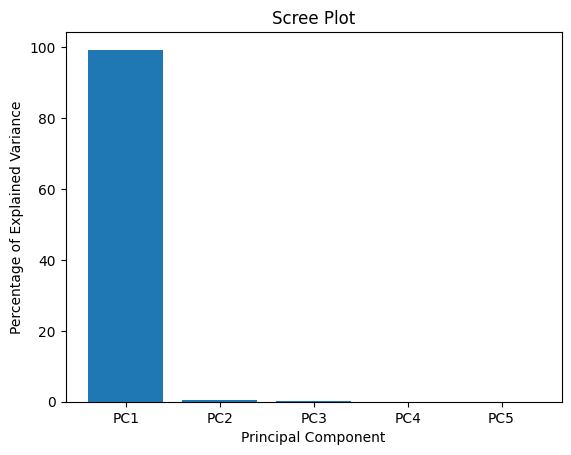

In [133]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

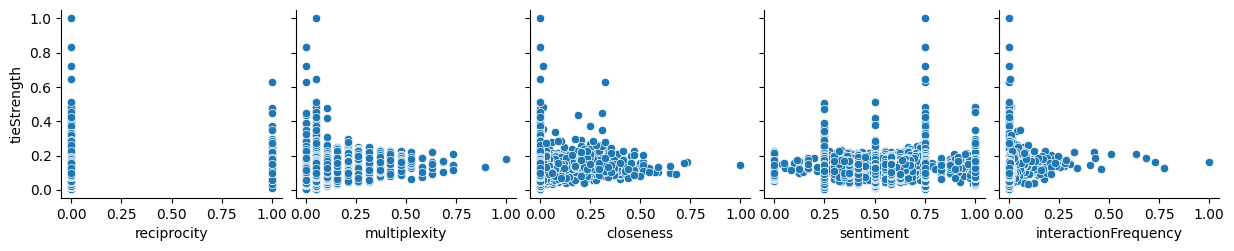

In [134]:
pp = sns.pairplot(data=df_train,
                  y_vars=['tieStrength'],
                  x_vars=['reciprocity', 'multiplexity', 'closeness', 'sentiment', 'interactionFrequency'])

## Train Model

In [135]:

x_params = ['reciprocity', 'multiplexity', 'closeness', 'sentiment', 'interactionFrequency']
y_params = "tieStrength"

In [136]:
def train_model(model, train:pd.DataFrame, validation:pd.DataFrame, x:List[str], y:str, metrics:Callable, pca=None):
    train_x = train[x].to_numpy()
    train_y = train[y].to_numpy()
    validation_x = validation[x].to_numpy()
    validation_y = validation[y].to_numpy()

    if pca != None:
        train_x = pca.fit_transform(train_x) if not _is_fitted(pca) else pca.transform(train_x)
        validation_x = pca.transform(validation_x)

    model.fit(train_x, train_y)
    validation_prediction_y = model.predict(validation_x)
    
    results = []
    model_name = model.__class__.__name__
    validation_results = {"model_name": model_name, "set_name": "validation"}
    for metric in metrics:
        metric_name = metric.__name__
        validation_results[metric_name] = metric(validation_y, validation_prediction_y)
    results.append(validation_results)
    train_prediction_y = model.predict(train_x)
    train_results = {"model_name": model_name, "set_name": "training"}
    for metric in metrics:
        metric_name = metric.__name__
        train_results[metric_name] = metric(train_y, train_prediction_y)
    results.append(train_results)
    return results


## Training

In [137]:
models = [linear_model.LinearRegression(),ensemble.RandomForestRegressor(), linear_model.Lasso(), linear_model.ElasticNet(),linear_model.Ridge(), linear_model.PoissonRegressor(), MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5,4,3,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False), SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)]
metrics = [mean_squared_error, root_mean_squared_error, mean_absolute_error, explained_variance_score, max_error]

In [138]:

def train_models(model, train:pd.DataFrame, validation:pd.DataFrame, x:List[str], y:str, metrics:List[Callable], pca=None):
    results = []
    for model in models:
        results.extend(train_model(model, train, validation, x, y, metrics, pca))
    return pd.DataFrame(results)
        
model_results = train_models(models, df_train, df_val, x_params, y_params, metrics)
model_results

,model_name,set_name,mean_squared_error,root_mean_squared_error,mean_absolute_error,explained_variance_score,max_error
0,LinearRegression,validation,0.000654,0.025568,0.020161,0.055919,0.511484
1,LinearRegression,training,0.000653,0.025547,0.020142,0.057972,0.887049
2,RandomForestRegressor,validation,0.000643,0.025361,0.020023,0.071158,0.506632
3,RandomForestRegressor,training,0.000638,0.025260,0.019941,0.079019,0.888216
4,Lasso,validation,0.000692,0.026314,0.020750,0.000000,0.510536
5,Lasso,training,0.000693,0.026322,0.020749,0.000000,0.885560
6,ElasticNet,validation,0.000692,0.026314,0.020750,0.000000,0.510536
7,ElasticNet,training,0.000693,0.026322,0.020749,0.000000,0.885560
8,Ridge,validation,0.000654,0.025567,0.020163,0.056001,0.511523
9,Ridge,training,0.000653,0.025547,0.020144,0.057960,0.887039


## Evaluation

In [139]:
def eval_model(model, test:pd.DataFrame, x:List[str], y:str, metrics:List[Callable], pca=None):
    test_x = test[x].to_numpy()
    test_y = test[y].to_numpy()

    if pca != None:
        test_x = pca.transform(test_x)

    predicted_y = model.predict(test_x)
    results = []
    model_name = model.__class__.__name__
    test_results = {"model_name": model_name, "set_name": "test"}
    for metric in metrics:
        metric_name = metric.__name__
        test_results[metric_name] = metric(test_y, predicted_y)
    results.append(test_results)
    return results



In [140]:
def eval_models(model, test:pd.DataFrame, x:List[str], y:str, metrics:List[Callable], pca=None):
    results = []
    for model in models:
        results.extend(eval_model(model, test, x, y, metrics, pca))
    return pd.DataFrame(results)

eval_results = eval_models(models, df_test, x_params, y_params, metrics)
eval_results
        

,model_name,set_name,mean_squared_error,root_mean_squared_error,mean_absolute_error,explained_variance_score,max_error
0,LinearRegression,test,0.000653,0.025545,0.020146,0.057983,0.575437
1,RandomForestRegressor,test,0.000643,0.025352,0.020011,0.072189,0.564861
2,Lasso,test,0.000693,0.026320,0.020749,0.000000,0.575569
3,ElasticNet,test,0.000693,0.026320,0.020749,0.000000,0.575569
4,Ridge,test,0.000653,0.025545,0.020148,0.057997,0.575571
5,PoissonRegressor,test,0.000693,0.026320,0.020750,0.000009,0.575562
6,MLPRegressor,test,0.000694,0.026339,0.020760,-0.001502,0.575543
7,SVR,test,0.000860,0.029324,0.023954,0.034655,0.561731


In [141]:
results = pd.concat([eval_results, model_results])
results = results.sort_values("model_name")
results

,model_name,set_name,mean_squared_error,root_mean_squared_error,mean_absolute_error,explained_variance_score,max_error
3,ElasticNet,test,0.000693,0.026320,0.020749,0.000000,0.575569
7,ElasticNet,training,0.000693,0.026322,0.020749,0.000000,0.885560
6,ElasticNet,validation,0.000692,0.026314,0.020750,0.000000,0.510536
2,Lasso,test,0.000693,0.026320,0.020749,0.000000,0.575569
4,Lasso,validation,0.000692,0.026314,0.020750,0.000000,0.510536
5,Lasso,training,0.000693,0.026322,0.020749,0.000000,0.885560
0,LinearRegression,test,0.000653,0.025545,0.020146,0.057983,0.575437
0,LinearRegression,validation,0.000654,0.025568,0.020161,0.055919,0.511484
1,LinearRegression,training,0.000653,0.025547,0.020142,0.057972,0.887049
13,MLPRegressor,training,0.000694,0.026341,0.020758,-0.001450,0.885534


## Visualization

In [142]:
grouped_results = results.set_index(["model_name"])


In [143]:
grouped_results

,set_name,mean_squared_error,root_mean_squared_error,mean_absolute_error,explained_variance_score,max_error
model_name,,,,,,
ElasticNet,test,0.000693,0.026320,0.020749,0.000000,0.575569
ElasticNet,training,0.000693,0.026322,0.020749,0.000000,0.885560
ElasticNet,validation,0.000692,0.026314,0.020750,0.000000,0.510536
Lasso,test,0.000693,0.026320,0.020749,0.000000,0.575569
Lasso,validation,0.000692,0.026314,0.020750,0.000000,0.510536
Lasso,training,0.000693,0.026322,0.020749,0.000000,0.885560
LinearRegression,test,0.000653,0.025545,0.020146,0.057983,0.575437
LinearRegression,validation,0.000654,0.025568,0.020161,0.055919,0.511484
LinearRegression,training,0.000653,0.025547,0.020142,0.057972,0.887049


<Axes: xlabel='model_name'>

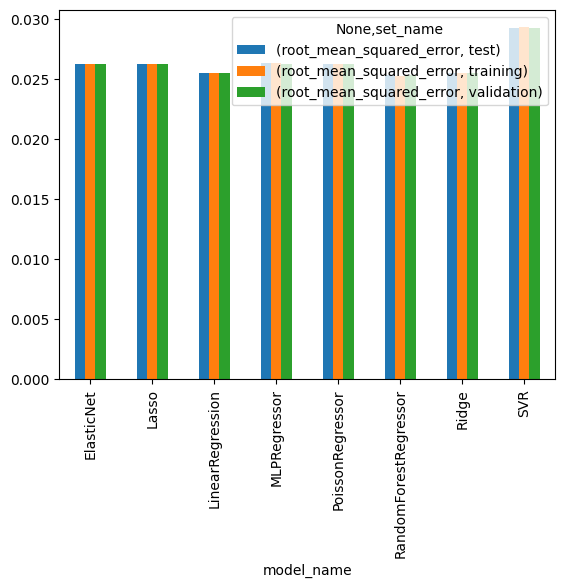

In [144]:

grouped_results[['set_name', 'root_mean_squared_error']].pivot(columns='set_name').plot.bar()

In [145]:
df_test.describe()

,postings,channels,upvotes,downvotes,follows,ignores,neighbourhoodOverlap,minLocalClusterinCoefficient,tieStrength,reciprocity,multiplexity,closeness,sentiment,interactionFrequency
count,1.110085e+06,1.110085e+06,1.110085e+06,1.110085e+06,1.110085e+06,1.110085e+06,1.110085e+06,1.110085e+06,1.110085e+06,1.110085e+06,1.110085e+06,1.110085e+06,1.110085e+06,1.110085e+06
mean,5.040262e-04,5.794725e-02,1.993399e-03,1.168496e-03,7.631848e-03,4.326245e-03,9.000039e-02,1.226760e-01,1.144465e-01,1.900755e-03,5.794725e-02,2.806356e-04,6.357014e-01,2.319304e-03
std,2.636352e-03,2.340603e-02,3.546540e-03,3.419861e-03,6.861531e-02,4.639521e-02,5.962057e-02,2.472961e-02,2.631964e-02,4.355622e-02,2.340603e-02,7.073001e-03,1.995690e-01,3.647600e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.774259e-08,0.000000e+00,2.731916e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.263158e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.480069e-02,1.064313e-01,9.623530e-02,0.000000e+00,5.263158e-02,0.000000e+00,5.000000e-01,1.612903e-03
50%,0.000000e+00,5.263158e-02,1.996008e-03,0.000000e+00,0.000000e+00,0.000000e+00,7.654771e-02,1.216236e-01,1.125923e-01,0.000000e+00,5.263158e-02,0.000000e+00,7.500000e-01,1.612903e-03
75%,0.000000e+00,5.263158e-02,1.996008e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.227955e-01,1.378186e-01,1.308296e-01,0.000000e+00,5.263158e-02,0.000000e+00,7.500000e-01,1.612903e-03
max,8.005952e-01,1.000000e+00,8.323353e-01,5.454545e-01,1.000000e+00,1.000000e+00,9.824519e-01,6.623377e-01,6.900090e-01,1.000000e+00,1.000000e+00,9.117647e-01,1.000000e+00,8.274194e-01
